**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Redes Neuronales Convolucionales

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Referencias
1. Ian Goodfellow, Yosua Bengio and Aaron Courville, Deep Learning, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, A guide to convolution arithmetic for deep learning, ArXiv:1603.07285v2, 2018
3. [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
4. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

## Contenido

* [Introducción](#Introducción)
* [Casos de Estudio](#Casos-de-Estudio)
    * [MNIST](#MNIST)
    * [MNIST Fashion](#MNIST-Fashion)
    * [Dogs vs. Cats](#Dogs-vs.-Cats)
    * [Horse or Human](#Horse-or-Human)
    * [Piedra Papel o Tijeras](#Piedra-Papel-o-Tijeras)

## Introducción 

En el anterior episodio...

**Recordemos que todo este proceso es para construir redes de esta manera:**

![cnn-arq](https://miro.medium.com/max/576/1*uUYc126RU4mnTWwckEbctw@2x.png)

Fuente: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

Hoy veremos algunos ejemplos memorables de redes neuronales convolucionadas.

Primero, importemos los módulos que necesitamos para nuestro estudio:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Nunca sobra comprobar la versión actual de tensorflow para futuros chequeos de inconsistencias:

In [2]:
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.2.0


## MNIST

Construyamos una red convolucional para ver el beneficio sobre una red densa.

Para este proceso, realicemos nuestra rutina de cargar los datos, observar unos cuantos ejemplos y comprobar unas cuantas estadísticas:

### Carga de Datos 

In [3]:
# apunta  los datos
mnist = tf.keras.datasets.mnist

# lee los conjuntos de datos, los cuales vienen separados de antemano para entrenamiento y test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Verificar forma de los datos
print("Forma de los datos:",training_images.shape)

Forma de los datos: (60000, 28, 28)


### Pre-procesamiento 

In [4]:
# reshape para colocar los datos de entrenamiento en el fomato apropiado.
# Agrega una dimensión al final y  normaliza los datos
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# reshape para colocar los datos de test en el fomato apropiado. Agrega una dimensión al final y  normaliza los datos
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

print("Nueva forma de los datos:", training_images.shape)

Nueva forma de los datos: (60000, 28, 28, 1)


### Visualización 

Datos en bruto

[[0.98823529 0.98823529 0.98823529 0.98823529 0.57254902]
 [0.98823529 0.98823529 0.98823529 0.96078431 0.33333333]
 [0.98823529 0.98823529 0.98823529 0.98823529 0.98823529]
 [0.87843137 0.46666667 0.79607843 0.98823529 0.98823529]
 [0.98823529 0.98823529 0.98823529 0.98823529 0.98823529]] 

Imagen Asociada



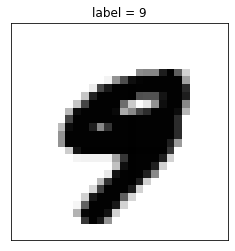

In [5]:
# muestra una imagen de entranamiento
azar=np.random.randint(len(training_images))
print("Datos en bruto\n")
print(training_images[azar,10:15,10:15,0],'\n')


print("Imagen Asociada\n")
plt.imshow(training_images[azar,:,:,0],cmap='binary')
plt.xticks([], [])
plt.yticks([], [])
plt.title('label = ' +str(training_labels[azar]))
plt.show()

### Definir el Modelo 

1. Capa 1: **Conv2D** con 32 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

2. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

3. Capa 3. **Flatten**. Toma todos los filtros resultantes  de la capa MaxPooling y los organiza como un único tensor unidimensional

4. Capa 4. **Dense**. Recibe el tensor saliente de la capa Flatten y genera una salida en 128 unidades, usando activación *relu*

5. Capa 5. **Dense**. Recibe el tensor unidmensional de tamaño 128 y lo transforma en la salida de 10 unidades. Hay 10 clases.

El predictor es al final transformado por la acticación *softmax* para obtener una distribución de la posible clase para la imagend e entrada

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Es de **Extremada importancia** ver el diseño de la red para ver qué tantos parámetros tiene el modelo:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


### Crea una clase derivada de tf.keras.callbacks.Callback 

Se usa para pasar funciones de control al algoritmo de estimación. 

Aquí la usaremos para el entrenamiento pare cuando se alcance un determinado accuracy con los datos de entrenamiento.

*tf.keras.callbacks.Callback* es una clase abstracta para permitir escribir métodos que actuan en el proceso de entranamiento o de test. Para detalles vea [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [8]:
class MNIST_Callback(tf.keras.callbacks.Callback):
    
    # método dentro de la clase myCallback, heredada de la clase Callback de keras
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.99):
            print("\nSe alcanzó un 99.9% de precisión en la validación! Cancelando Entrenamiento...")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = MNIST_Callback()


Observen como se pasan los callbacks

### Compilar el modelo

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Entrena el modelo

In [ ]:
history = model.fit(training_images, training_labels, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=64,
                    callbacks=[accu_callback])

Epoch 1/20
750/750 [==============================] - 83s 111ms/step - loss: 0.2220 - accuracy: 0.9358 - val_loss: 0.0940 - val_accuracy: 0.9733
Epoch 2/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 3/20
750/750 [==============================] - 84s 112ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0526 - val_accuracy: 0.9841
Epoch 4/20
750/750 [==============================] - 85s 113ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 5/20
750/750 [==============================] - 84s 112ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0542 - val_accuracy: 0.9849
Epoch 6/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 7/20
750/750 [==============================] - 120s 159ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0558 - val_a

### Evaluar el modelo

Veremos ahora qué tan bien hizoel modelo en su fase de entrenamiento, viendo las gráficas de entrenamiento tanto en pérdida como en precisión.

### Gráficas de funciones de pérdida y accuracy

In [ ]:
import matplotlib.pyplot as plt

# Del objeto history, podemos sacar la información guardada a traveś del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

### Evaluar el modelo con los dato de prueba (test)

In [ ]:
model.evaluate(test_images,test_labels)

### Muestra de algunas predicciones

Calcula las clases predichas las probabilidades calculadas por softmax

In [ ]:
preds = model.predict(test_images)
print(preds.shape)

Observemos que las predicciones vienen en forma de probabilidad:

In [ ]:
#Elegir un elemento de test al azar
azar_test=np.random.randint(len(test_images))

#mostrar vecto de probabilidades (resultado del softmax)
print(preds[azar_test])

Así pues, elegiremos el indice de la mayor probabilidad para elegir la etiqueta predicha:


In [ ]:
# Calcular el ínidce máximo por filas
label_preds=np.argmax(preds,axis=1)
print("Cuantos label predichos:",label_preds.shape,'\n')
print("Predicciones:\n")
print(label_preds)

Así pues, de nuestro elemento elegido al azar, podemos decir que la predicción es:

In [ ]:
print("Etiqueta predicha:",label_preds[azar_test])

In [ ]:
print("Máquina vs Humano\n")
plt.imshow(test_images[azar_test,:,:,0],cmap='binary')
#plt.axis('off')
plt.title('label humano = ' +str(test_labels[azar_test]))
plt.xlabel("label máquina: "+str(label_preds[azar_test]),fontsize=14)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### Detección de malas predicciones

In [ ]:
bad_pred=[]
for i in range (len(preds)):
    if label_preds[i]!=test_labels[i]:
        bad_pred.append(i)

In [ ]:
print(bad_pred)

In [ ]:
azar_test= np.random.randint(len(bad_pred))
plt.title("Mala Predicción:",fontsize=16)
plt.imshow(training_images[bad_pred[azar_test],:,:,0],cmap='gray')
plt.show()

print('label =' ,training_labels[bad_pred[azar_test]], ', prediction = ',np.argmax(preds[bad_pred[azar_test]]))

### Matriz de Confusión 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix:\n')
print(confusion_matrix(test_labels, label_preds))

#print(classification_report(test_labels, label_preds))

### Test Propio

In [ ]:
from PIL import Image

mi_fotico=Image.open("../Imagenes/mi_fotico.jpeg")

plt.title('Imagen hecha a mano',fontsize=15)
plt.imshow(mi_fotico,cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
mi_dibujito=Image.open("../Imagenes/test_reduced.png")
mi_dibujito=mi_dibujito.convert('L')

plt.title('Imagen hecha a mano',fontsize=15)
plt.imshow(mi_dibujito,cmap='binary')
plt.axis('off')
plt.show()

data_mi_dibujito=(np.array(mi_dibujito))/255.
#plt.imshow(data_mi_dibujito,cmap='binary')
#print(data_mi_dibujito[:28,:15])
print("Forma de los datos:",data_mi_dibujito.shape)
data_mi_dibujito=data_mi_dibujito.reshape(1,28,28,1)
print("Nueva Forma de los datos:",data_mi_dibujito.shape)

In [ ]:
yo_pred=model.predict(data_mi_dibujito)
print(yo_pred,'\n')
print("Número predicho:",np.argmax(yo_pred))

Podemos ver que el modelo depende muchas veces de la forma en que ingresen los datos de entrada.

Para el ejercicio de la tablet digital, **¡nada mal!**

[[Volver al Inicio]](#Contenido)

## MNIST Fashion

Construyamos una red convolucional para ver el beneficio sobre una red densa.

Para este proceso, realicemos nuestra rutina de cargar los datos, observar unos cuantos ejemplos y comprobar unas cuantas estadísticas:

### Carga de Datos 

In [43]:
# apunta  los datos
mnist = tf.keras.datasets.fashion_mnist

# lee los conjuntos de datos, los cuales vienen separados de antemano para entrenamiento y test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Verificar forma de los datos
print("Forma de los datos:",training_images.shape)

Forma de los datos: (60000, 28, 28)


### Pre-procesamiento 

In [44]:
# reshape para colocar los datos de entrenamiento en el fomato apropiado.
# Agrega una dimensión al final y  normaliza los datos
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# reshape para colocar los datos de test en el fomato apropiado. Agrega una dimensión al final y  normaliza los datos
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

print("Nueva forma de los datos:", training_images.shape)

Nueva forma de los datos: (60000, 28, 28, 1)


### Visualización 

Datos en bruto

[[0.69803922 0.71764706 0.72156863 0.72156863 0.72156863]
 [0.70196078 0.72941176 0.73333333 0.7372549  0.73333333]
 [0.70980392 0.7372549  0.7372549  0.74117647 0.73333333]
 [0.71372549 0.74509804 0.74509804 0.74117647 0.74509804]
 [0.72156863 0.74901961 0.74901961 0.74117647 0.74509804]] 

Imagen Asociada



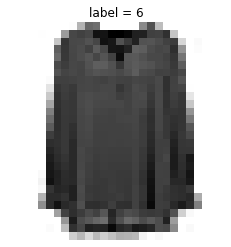

In [45]:
# muestra una imagen de entranamiento
azar=np.random.randint(len(training_images))
print("Datos en bruto\n")
print(training_images[azar,10:15,10:15,0],'\n')


print("Imagen Asociada\n")
plt.imshow(training_images[azar,:,:,0],cmap='binary')
plt.axis('off')
plt.title('label = ' +str(training_labels[azar]))
plt.show()

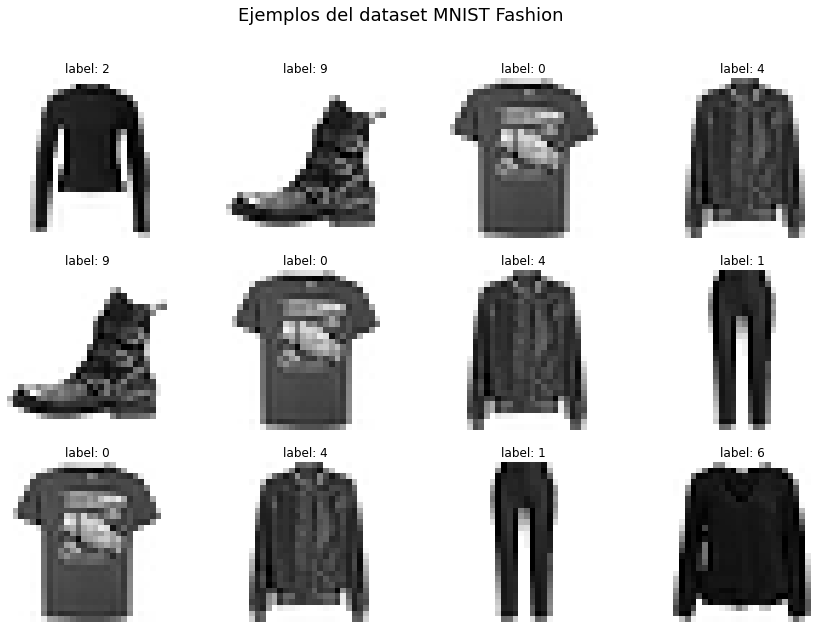


Indices Elegidos:  [36052   299 46481 24468 51140 40191 44690 42744  5424 16172 13509 38254] 


Elementos Elegidos:  [2 9 0 4 1 6 9 5 9 2 7 2] 



In [47]:
#Cuántas filas
filas=3
#Cuantas columnas
colus=4
#Elementos totales
n=filas*colus
#Elegir una muestra del dataset via índices
vector_azar=np.random.randint(len(training_images),size=(n,))
# contador para dibujar en la grilla
w=1
#iniciar espacio de dibujo
plt.figure(figsize=(15,10))
#titulo
plt.suptitle("Ejemplos del dataset MNIST Fashion",fontsize=18)

# Loop anidado para recorrer la matriz completa
for i in range(filas):
    for j in range(colus):
        
        # subplots se peden contar incrementalmente
        plt.subplot(filas,colus,w)
        # dibujar el ejemplo de la muestra convertida a una matrix 28X28
        plt.imshow(training_images[vector_azar[i+j]].reshape((28, 28)), cmap="binary")
        #mostrar la etiqueta dada por el humano a dicho ejemplo (Aprendizaje supervisado)
        plt.title("label: "+str(training_labels[vector_azar[i+j]]))
        #No mostrar ejes corrdenados
        plt.axis("off")
        # Incrementar contador
        w+=1

plt.show()
#mostrar índices de los ejemplos elegidos
print("\nIndices Elegidos: ",vector_azar,"\n")
# mostrar etiquetas correspondientes
print("\nElementos Elegidos: ",training_labels[vector_azar],"\n")

### Definir el Modelo 

1. Capa 1: **Conv2D** con 64 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

2. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

3. Capa 1: **Conv2D** con 64 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

4. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

5. Capa 3. **Flatten**. Toma todos los filtros resultantes  de la capa MaxPooling y los organiza como un único tensor unidimensional

6. Capa 4. **Dense**. Recibe el tensor saliente de la capa Flatten y genera una salida en 128 unidades, usando activación *relu*

7. Capa 5. **Dense**. Recibe el tensor unidmensional de tamaño 128 y lo transforma en la salida de 10 unidades. Hay 10 clases.

El predictor es al final transformado por la acticación *softmax* para obtener una distribución de la posible clase para la imagend e entrada

In [53]:
model = tf.keras.models.Sequential([
    ###Capas convolucionadas
    
    #Convolución 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    #Pooling 1
  tf.keras.layers.MaxPooling2D(2, 2),
    #Convolución 2
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Pooling 2
  tf.keras.layers.MaxPooling2D(2,2),
    
    ###Capas Densas
    
    # Aplanamiento
  tf.keras.layers.Flatten(),
    #Capa Densa
  tf.keras.layers.Dense(128, activation='relu'),
    #Capa densa, clasificación
  tf.keras.layers.Dense(10, activation='softmax')
])

Es de **Extremada importancia** ver el diseño de la red para ver qué tantos parámetros tiene el modelo:

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### Crea una clase derivada de tf.keras.callbacks.Callback 

Se usa para pasar funciones de control al algoritmo de estimación. 

Aquí la usaremos para el entrenamiento pare cuando se alcance un determinado accuracy con los datos de entrenamiento.

*tf.keras.callbacks.Callback* es una clase abstracta para permitir escribir métodos que actuan en el proceso de entranamiento o de test. Para detalles vea [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [55]:
class MNIST_Callback(tf.keras.callbacks.Callback):
    
    # método dentro de la clase myCallback, heredada de la clase Callback de keras
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nSe alcanzó un 99.9% de precisión en la validación! Cancelando Entrenamiento...")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = MNIST_Callback()


Observen como se pasan los callbacks

### Compilar el modelo

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Entrena el modelo

In [61]:
history = model.fit(training_images, training_labels, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=64,
                    callbacks=[accu_callback])

Epoch 1/20
750/750 [==============================] - 170s 227ms/step - loss: 0.3747 - accuracy: 0.8652 - val_loss: 0.3372 - val_accuracy: 0.8774
Epoch 2/20
750/750 [==============================] - 141s 188ms/step - loss: 0.3192 - accuracy: 0.8840 - val_loss: 0.3130 - val_accuracy: 0.8856
Epoch 3/20
750/750 [==============================] - 159s 213ms/step - loss: 0.2901 - accuracy: 0.8932 - val_loss: 0.2862 - val_accuracy: 0.8972
Epoch 4/20
750/750 [==============================] - 155s 207ms/step - loss: 0.2623 - accuracy: 0.9031 - val_loss: 0.2727 - val_accuracy: 0.9005
Epoch 5/20
750/750 [==============================] - 156s 208ms/step - loss: 0.2405 - accuracy: 0.9100 - val_loss: 0.2674 - val_accuracy: 0.9010
Epoch 6/20
750/750 [==============================] - 156s 208ms/step - loss: 0.2255 - accuracy: 0.9155 - val_loss: 0.2691 - val_accuracy: 0.9030
Epoch 7/20
750/750 [==============================] - 154s 206ms/step - loss: 0.2088 - accuracy: 0.9231 - val_loss: 0.2667 -

### Evaluar el modelo

Veremos ahora qué tan bien hizoel modelo en su fase de entrenamiento, viendo las gráficas de entrenamiento tanto en pérdida como en precisión.

### Gráficas de funciones de pérdida y accuracy

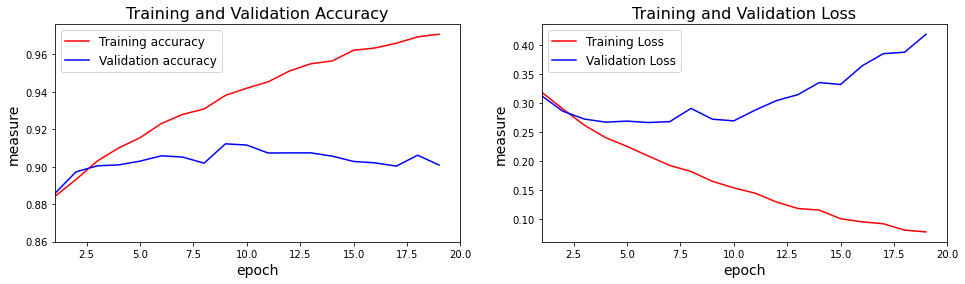

In [62]:
import matplotlib.pyplot as plt

# Del objeto history, podemos sacar la información guardada a traveś del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

### Evaluar el modelo con los dato de prueba (test)

In [63]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 22s 69ms/step - loss: 0.4475 - accuracy: 0.8997


[0.4474957585334778, 0.8996999859809875]

### Muestra de algunas predicciones

Calcula las clases predichas las probabilidades calculadas por softmax

In [64]:
preds = model.predict(test_images)
print(preds.shape)

(10000, 10)


Observemos que las predicciones vienen en forma de probabilidad:

In [65]:
#Elegir un elemento de test al azar
azar_test=np.random.randint(len(test_images))

#mostrar vecto de probabilidades (resultado del softmax)
print(preds[azar_test])

[1.1732183e-10 1.5824660e-15 5.8234225e-12 1.7401260e-14 2.8840930e-10
 2.1303152e-18 1.0000000e+00 2.6844577e-18 7.3858960e-16 4.7479677e-22]


Así pues, elegiremos el indice de la mayor probabilidad para elegir la etiqueta predicha:


In [66]:
# Calcular el ínidce máximo por filas
label_preds=np.argmax(preds,axis=1)
print("Cuantos label predichos:",label_preds.shape,'\n')
print("Predicciones:\n")
print(label_preds)

Cuantos label predichos: (10000,) 

Predicciones:

[9 2 1 ... 8 1 5]


Así pues, de nuestro elemento elegido al azar, podemos decir que la predicción es:

In [67]:
print("Etiqueta predicha:",label_preds[azar_test])

Etiqueta predicha: 6


Máquina vs Humano



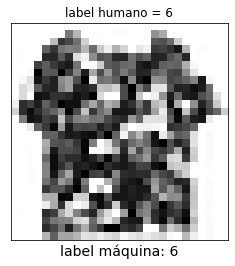

In [68]:
print("Máquina vs Humano\n")
plt.imshow(test_images[azar_test,:,:,0],cmap='binary')
#plt.axis('off')
plt.title('label humano = ' +str(test_labels[azar_test]))
plt.xlabel("label máquina: "+str(label_preds[azar_test]),fontsize=14)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### Detección de malas predicciones

In [69]:
bad_pred=[]
for i in range (len(label_preds)):
    if label_preds[i]!=test_labels[i]:
        bad_pred.append(i)

In [70]:
print(bad_pred)

[12, 21, 23, 25, 27, 42, 44, 48, 49, 57, 66, 67, 68, 103, 122, 135, 141, 147, 150, 166, 170, 229, 244, 247, 248, 266, 276, 316, 320, 332, 339, 368, 374, 378, 379, 381, 382, 389, 394, 404, 441, 444, 452, 454, 457, 460, 474, 491, 495, 526, 534, 570, 578, 600, 616, 628, 634, 635, 655, 669, 670, 674, 681, 688, 701, 702, 711, 724, 732, 744, 760, 787, 801, 805, 851, 856, 858, 870, 875, 881, 890, 893, 909, 920, 930, 937, 938, 948, 956, 960, 965, 972, 976, 977, 979, 984, 985, 994, 1000, 1004, 1005, 1055, 1056, 1066, 1101, 1104, 1111, 1124, 1130, 1139, 1142, 1147, 1152, 1160, 1162, 1165, 1174, 1185, 1194, 1197, 1210, 1213, 1218, 1224, 1231, 1234, 1249, 1254, 1270, 1280, 1285, 1286, 1287, 1300, 1305, 1326, 1329, 1336, 1356, 1387, 1394, 1408, 1425, 1449, 1462, 1469, 1471, 1476, 1487, 1496, 1504, 1509, 1521, 1522, 1528, 1533, 1547, 1557, 1561, 1586, 1626, 1632, 1641, 1643, 1650, 1665, 1692, 1712, 1731, 1743, 1744, 1745, 1771, 1777, 1778, 1806, 1810, 1814, 1833, 1852, 1856, 1861, 1867, 1872, 1895, 

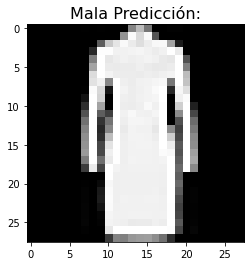

label = 3 , prediction =  3


In [71]:
azar_test= np.random.randint(len(bad_pred))
plt.title("Mala Predicción:",fontsize=16)
plt.imshow(training_images[bad_pred[azar_test],:,:,0],cmap='gray')
plt.show()

print('label =' ,training_labels[bad_pred[azar_test]], ', prediction = ',np.argmax(preds[bad_pred[azar_test]]))

### Matriz de Confusión 

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix:\n')
print(confusion_matrix(test_labels, label_preds))

#print(classification_report(test_labels, label_preds))

Confusion Matrix:

[[779   1  25  32   6   3 148   0   5   1]
 [  0 977   1  12   3   0   5   0   2   0]
 [ 10   0 860   9  52   0  66   1   2   0]
 [  5  11   5 901  45   0  30   0   3   0]
 [  0   0  52  22 869   0  57   0   0   0]
 [  0   0   0   0   0 984   0  12   0   4]
 [ 74   1  71  28  66   0 752   1   7   0]
 [  0   0   0   0   0  12   0 975   0  13]
 [  3   1   2   4   2  15  13  12 946   2]
 [  1   0   0   0   0   6   0  39   0 954]]


### Visualizando Convoluciones 

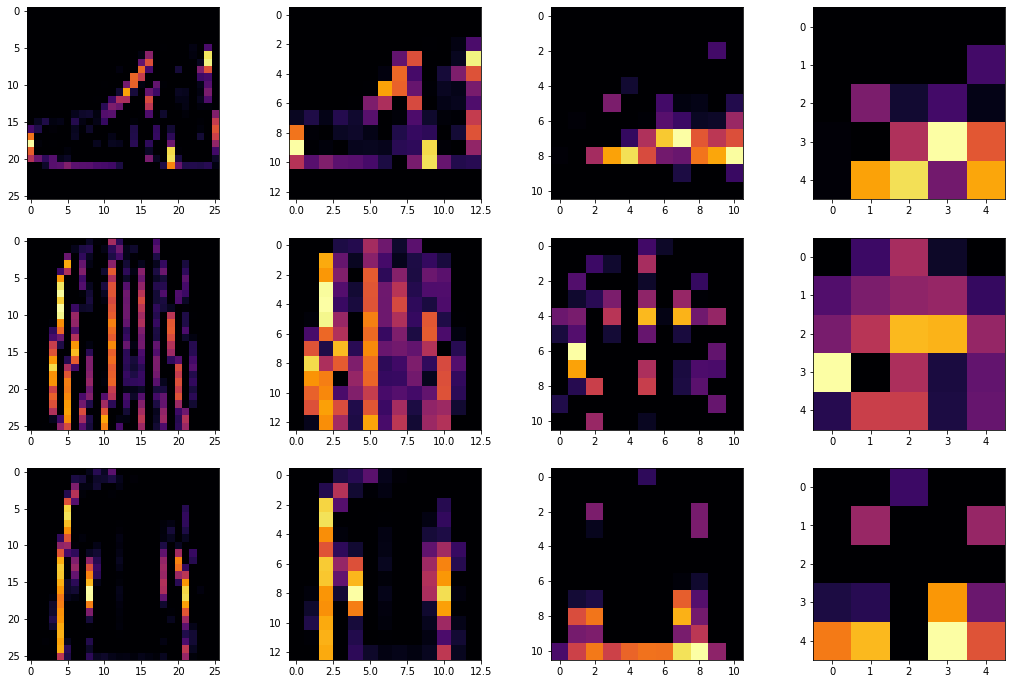

In [77]:
f, axarr = plt.subplots(3,4,figsize=(18,12))

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1


from tensorflow.keras import models


layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

[[Volver al Inicio]](#Contenido)

## Dogs vs. Cats 

Hay un conjunto muy famoso en la historia de la visión por computador y los ciber ataques:

[**Dogs Vs. Cats**](https://www.kaggle.com/c/dogs-vs-cats)

"*Originalmente, esto fue un desafío en la construcción de un clasificador dirigido a los mejores profesionales de aprendizaje automático e inteligencia artificial del mundo, pero la tecnología ha avanzado tan rápido que verá cómo puede hacerlo en solo unos minutos con una simple programación de red neuronal convolucional.*" -Lawrence Moroney.

Cabe resaltar lo siguiente:

**Los conjuntos de juguete de MNIST/Fashion contenían imágenes del mismo tamaño y estaban a escala de grises**.

Esto se aleja un poco de la vida real, así que ahora enfrentaremos un problema más difícil.

**Un problema donde las imágenes vengan en todos los tamaños y en todos los colores :)**

Así que, como primera instancia, tendremos que hacer un pre-procesamiento de los datos.

Por ejemplo, colocaremos todas las imágenes del mismo tamaño (escalamiento).

Seguiremos los siguientes pasos:

1. Explorar el conjunto de datos.
2. Construir y Entrenar una red neuronal que reconozca la diferencia entre los dos.
3. Evaluar la precisión de Entrenamiento y Validación.

**ADVERTENCIA:** Este ejercicio puede ser muy pesado para su computador personal. Considere usar Colaboratory

### Explorando los Datos

La siguiente práctica la haremos en **Colaboratory**.

Si desea hacerlo de manera local, le recomendamos usar las rutas de ficheros apropiadas para su sistema operativo.

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

### Descomprimiendo Datos 

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/home/daniel/Data/CatDog')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


### Generando listas de nombres 

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.236.jpg', 'cat.915.jpg', 'cat.63.jpg', 'cat.265.jpg', 'cat.364.jpg', 'cat.338.jpg', 'cat.885.jpg', 'cat.60.jpg', 'cat.448.jpg', 'cat.715.jpg']
['dog.196.jpg', 'dog.703.jpg', 'dog.564.jpg', 'dog.793.jpg', 'dog.857.jpg', 'dog.617.jpg', 'dog.200.jpg', 'dog.229.jpg', 'dog.127.jpg', 'dog.209.jpg']


###  Verificando cantidades de Datos

In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


### Visualizando algunos Ejemplos

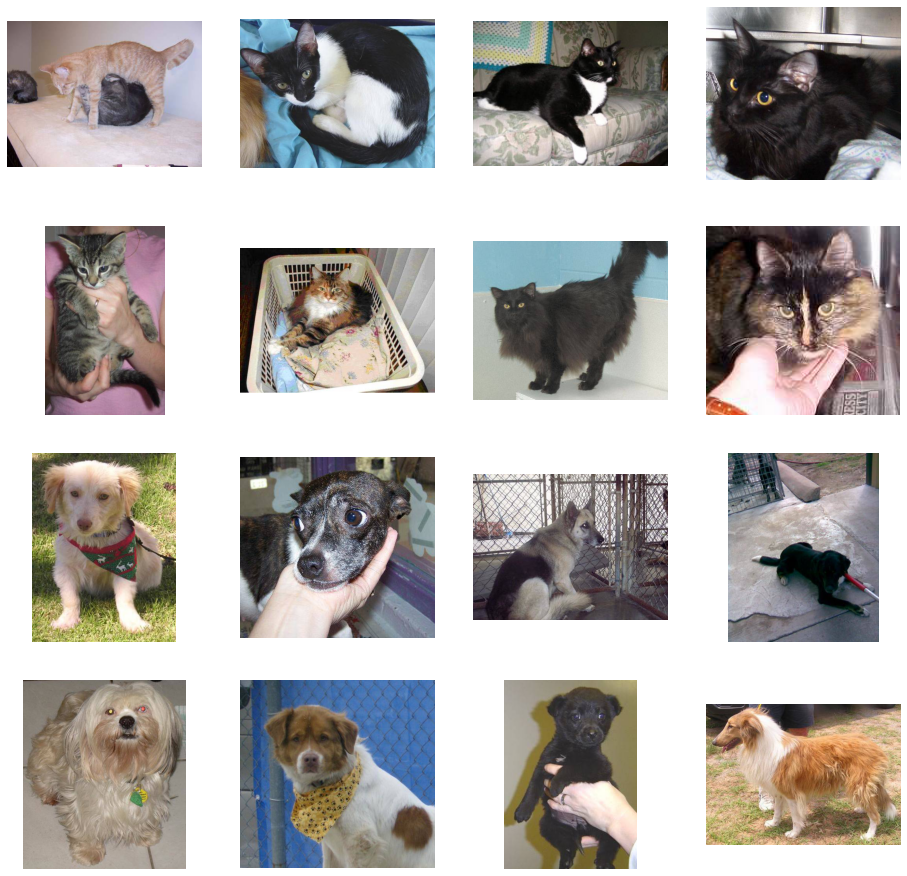

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Malla de imagenes 4x4
nrows = 4
ncols = 4

pic_index = 0 # Indice para iterar sobre las imagenes

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Diseñando Red Neuronal

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Veamos un resumen de la red para ver el número de parámetros y estructura.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Compilar Modelo 

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

###  Generador de Imagenes para el entrenamiento

En este punto observaremos algo nuevo.

Como tenemos muchos datos, y sería muy pesado para el computador tenerlos en memoria, generaremos un apuntador a los directorios que contienen las imágenes e iremos leyendolas a medida que se va entrenando la red.

Estos apuntadores se conocen como **ImageDataGenerator**.

Son herramientas muy útiles, porque además permiten aumentar el número de datos de manera artificial y por ejemplo, escalar los datos a un mismo tamaño.

**Los invitamos a revisar sus parámetros opcionales, se sorprenderán.**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizar Datos
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en grupos de 20, escalando a 150x150 usando train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de validación en grupos de 20, escalando a 150x150 usando test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Entrenar Modelo de Red Neuronal Convolucional

In [15]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 134s - loss: 0.7714 - accuracy: 0.5270 - val_loss: 0.6820 - val_accuracy: 0.5610
Epoch 2/15
100/100 - 143s - loss: 0.6547 - accuracy: 0.6365 - val_loss: 0.6161 - val_accuracy: 0.6790
Epoch 3/15
100/100 - 114s - loss: 0.5806 - accuracy: 0.7075 - val_loss: 0.5879 - val_accuracy: 0.6860
Epoch 4/15
100/100 - 86s - loss: 0.5267 - accuracy: 0.7490 - val_loss: 0.6484 - val_accuracy: 0.6550
Epoch 5/15
100/100 - 71s - loss: 0.4319 - accuracy: 0.7960 - val_loss: 0.5751 - val_accuracy: 0.7080
Epoch 6/15
100/100 - 83s - loss: 0.3819 - accuracy: 0.8290 - val_loss: 0.6086 - val_accuracy: 0.6910
Epoch 7/15
100/100 - 76s - loss: 0.2781 - accuracy: 0.8780 - val_loss: 0.6481 - val_accuracy: 0.7230
Epoch 8/15
100/100 - 80s - loss: 0.2147 - accuracy: 0.9130 - val_loss: 0.7500 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 81s - loss: 0.1537 - accuracy: 0.9345 - val_loss: 0.8583 - val_accuracy: 0.7030
Epoch 10/15
100/100 - 79s - loss: 0.1047 - accuracy: 0.9630 - val_loss: 1.0802 - val_acc

### Haciendo uso del Modelo (Sólo funciona en Colab) 

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

#Cargar imagen desde Colab
uploaded=files.upload()

for fn in uploaded.keys():
 
    # Predecir imagen
    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))
    
    #Propcesar Imagen
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    # Usar Modelo
    classes = model.predict(images, batch_size=10)
    # Mostrar resultados
    print(classes[0])
    #Clasificar
    if classes[0]>0.5:
    print(fn + " Es un Perro")

    else:
    print(fn + " Es un Gato")

### Visualizando Representaciones Intermedias

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Gráficas de funciones de pérdida y accuracy

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

### Liberar recursos y RAM 

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

[[Volver al Inicio]](#Contenido)

## Horse or Human

### Historia 

Podremos encontrar un poco de historia sobre este dataset [aquí](https://www.kaggle.com/sanikamal/horses-or-humans-dataset).

### Cargar Datos

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-01 17:17:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.173.208, 216.58.222.208, 172.217.28.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.173.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142,65M   904KB/s    in 3m 45s  

2020-10-01 17:21:05 (650 KB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-10-01 17:22:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.173.208, 172.217.173.48, 172.217.30.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.173.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10,95M  1,33MB/s    in 8,8s    

2020-10-01 17:23:05 (1,24 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)